In [23]:
import pandas as pd

# Loading the dataset
file_path = '/transactions.xlsx'
# Reading Excel file to check content
data = pd.read_excel(file_path)

# Displaying the first few rows of the dataset
data.head()


,transaction_price,transaction_date,price_of_meter,neighborh_aname,type,region,area
0,340000000.0,2020-06-15,339.632857,الرمال,قطعة أرض,منطقة الرياض,1001081.00
1,1118027.0,2020-07-15,1384.999504,الرمال,قطعة أرض,منطقة الرياض,807.24
2,2329390.0,2020-08-16,1000.257645,الرمال,قطعة أرض,منطقة الرياض,2328.79
3,12500000.0,2020-08-25,250.000000,الرمال,قطعة أرض,منطقة الرياض,50000.00
4,2650000.0,2020-10-01,815.384615,الرمال,قطعة أرض,منطقة الرياض,3250.00


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Drop rows with missing values (if any)
data_clean = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()

# Encoding 'neighborh_aname', 'type', and 'region' columns
data_clean['neighborh_aname'] = label_encoder.fit_transform(data_clean['neighborh_aname'])
data_clean['type'] = label_encoder.fit_transform(data_clean['type'])
data_clean['region'] = label_encoder.fit_transform(data_clean['region'])

# Selecting features and target variable
X = data_clean[['price_of_meter', 'area', 'neighborh_aname', 'type', 'region']]
y = data_clean['transaction_price']

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Saving the model
model_path = '/regression_model.pkl'
joblib.dump(reg_model, model_path)



mse, r2


(165002475794072.03, -0.09326405025429763)

In [27]:
from sklearn.ensemble import RandomForestRegressor


# Extract year and month from 'transaction_date'
data_clean['transaction_date'] = pd.to_datetime(data_clean['transaction_date'])
data_clean['year'] = data_clean['transaction_date'].dt.year
data_clean['month'] = data_clean['transaction_date'].dt.month

# Encode categorical variables
data_clean['neighborh_aname'] = data_clean['neighborh_aname'].astype('category').cat.codes
data_clean['type'] = data_clean['type'].astype('category').cat.codes
data_clean['region'] = data_clean['region'].astype('category').cat.codes

# Select features and target
X = data_clean[['price_of_meter', 'area', 'neighborh_aname', 'type', 'region', 'year', 'month']]
y = data_clean['transaction_price']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'R-Squared: {r2_rf}')

# Save the model
joblib.dump(rf_model, 'improved_rf_model.pkl')


Mean Squared Error: 18410688260114.254
R-Squared: 0.8780155054137383


['improved_rf_model.pkl']

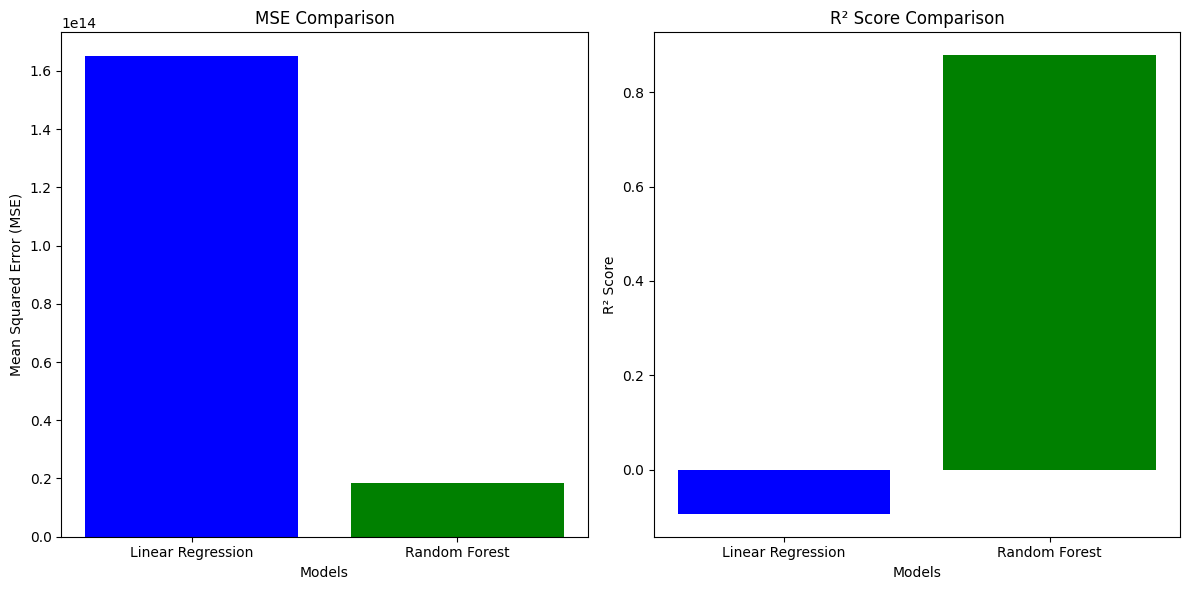

In [28]:
import matplotlib.pyplot as plt

# MSE and R² values for both models
model_names = ['Linear Regression', 'Random Forest']
mse_values = [mse,mse_rf]
r2_values = [r2,r2_rf]

# Create subplots for MSE and R² score comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for MSE
ax[0].bar(model_names, mse_values, color=['blue', 'green'])
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].set_xlabel('Models')

# Plot for R² Score
ax[1].bar(model_names, r2_values, color=['blue', 'green'])
ax[1].set_title('R² Score Comparison')
ax[1].set_ylabel('R² Score')
ax[1].set_xlabel('Models')

# Display the plots
plt.tight_layout()
plt.show()


In [34]:

from sklearn.preprocessing import StandardScaler



# Calculate the median of the features for prediction
median_values = data_clean[['price_of_meter', 'area', 'neighborh_aname', 'type', 'region']].median()

# Create a DataFrame for 2025 predictions
data_2025 = pd.DataFrame({
    'price_of_meter': [median_values['price_of_meter']] * 12,  # Use median price per meter
    'area': [median_values['area']] * 12,                      # Use median area
    'neighborh_aname': [median_values['neighborh_aname']] * 12, # Use median neighborhood
    'type': [median_values['type']] * 12,                       # Use median type
    'region': [median_values['region']] * 12,                   # Use median region
    'year': [2025] * 12,                                        # Set the year to 2025
    'month': list(range(1, 13))                                 # Predict for each month of 2025
})

# Scale the data using the same scaler as during training
scaler = StandardScaler()
scaler.fit(data_clean[['price_of_meter', 'area', 'neighborh_aname', 'type', 'region', 'year', 'month']])  # Fit the scaler
X_2025_scaled = scaler.transform(data_2025)

# Make predictions for 2025
predicted_prices_2025 = rf_model.predict(X_2025_scaled)

# Combine predictions with the month data for a complete 2025 forecast
data_2025['predicted_price'] = predicted_prices_2025

# Display the predictions for each month of 2025
print(data_2025[['year', 'month', 'predicted_price']])


    year  month  predicted_price
0   2025      1     1.160226e+06
1   2025      2     1.160298e+06
2   2025      3     1.160280e+06
3   2025      4     1.160895e+06
4   2025      5     1.161172e+06
5   2025      6     1.161666e+06
6   2025      7     1.162892e+06
7   2025      8     1.159883e+06
8   2025      9     1.159802e+06
9   2025     10     1.159792e+06
10  2025     11     1.160092e+06
11  2025     12     1.157467e+06


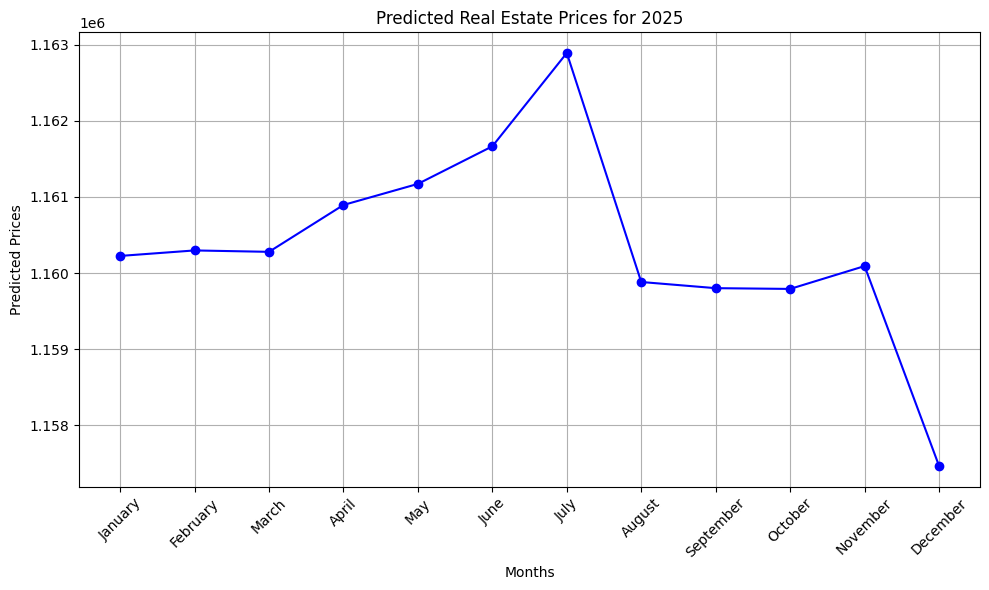

In [38]:
import matplotlib.pyplot as plt


# predictions for 2025
months = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS').strftime('%B')
predicted_prices = predicted_prices_2025

# Plot predictions for 2025
plt.figure(figsize=(10, 6))
plt.plot(months, predicted_prices, marker='o', linestyle='-', color='blue')
plt.title('Predicted Real Estate Prices for 2025')
plt.xlabel('Months')
plt.ylabel('Predicted Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
